In [1]:
from numpy import *
from scipy.sparse import *
from sparsesvd import sparsesvd as svd
import matplotlib.pyplot as plt

In [33]:
# grazie Facchini
def filterTarget(m):
    PLIDs = load("fucking_ordered_playlist.npy")
    TIDs = load("fucking_ordered_tracks.npy")
    target_playlists=genfromtxt("target_playlists.csv",skip_header=1)
    target_tracks=genfromtxt("target_tracks.csv", skip_header=1)
    k = m[isin(PLIDs, target_playlists)]
    k = k[:, isin(TIDs, target_tracks)]
    return k

def filterPLrow(m):
    PLIDs = load("fucking_ordered_playlist.npy")
    target_playlists=genfromtxt("target_playlists.csv",skip_header=1)
    k = m[isin(PLIDs, target_playlists)]
    return k 

def filterTcol(m):
    TIDs = load("fucking_ordered_tracks.npy")
    target_tracks=genfromtxt("target_tracks.csv", skip_header=1)
    k = m[:, isin(TIDs, target_tracks)]
    return k


monoArtist=load("target_playlist_mono_artist.npy")
monoArtistPlID=monoArtist[:,0]
monoArtistArtistID=monoArtist[:,1]
artistIndexes=load("uniqueArtists_NeededToIndexThe_ArtistReducedMatrices.npy")
artistTracks=load_npz("artists_with_tracksID_ordered_by_occurrencies.npz")
target_playlists=genfromtxt("target_playlists.csv",skip_header=1)
playlists_with_tracks=load("playlists_with_tracks.npy")
target_tracks_ordered = load("targetTracksOrdered.npy")


def getsimil(plid, similrow, n):
    ptracks = playlists_with_tracks[where(playlists_with_tracks[:,0]==plid),1:]
    maxi = flip(argsort(similrow), axis=0)
    r = []
    for m in maxi:
        if(not isin(target_tracks_ordered[m], ptracks)):
           r.append(target_tracks_ordered[m])
           if(len(r)==n):
               return r
        
PLIDs = load("fucking_ordered_playlist.npy")
TIDs = load("fucking_ordered_tracks.npy")
    
import sys
def progress(count, total, status=''):
    bar_len = 60
    filled_len = int(round(bar_len * count / float(total)))

    percents = round(100.0 * count / float(total), 1)
    bar = '=' * filled_len + '-' * (bar_len - filled_len)

    sys.stdout.write('[%s] %s%s ...%s\r' % (bar, percents, '%', status))
    sys.stdout.flush() 

tar=10000

def computeMono(fname, finalPlSim):
    targetP = load("fucking_ordered_playlist.npy")
    playlists_with_tracks=load("playlists_with_tracks.npy")
    target_playlists=genfromtxt("target_playlists.csv",skip_header=1)
    targetP = targetP[isin(targetP, target_playlists)]
    with open(fname,"a") as myfile:
        myfile.write("playlist_id,track_ids\n")
        for pl, similsum, i in zip(targetP, finalPlSim, range(tar)):
            progress(i, tar, status="done")
            plID=pl
            s = str(int(plID))
            s += ","
            if(isin(plID,monoArtistPlID)):#guarda se c'è un artista solo
                artist=monoArtistArtistID[where(monoArtistPlID==plID)[0][0]]#l'unico artista della playlist
                artistIndex=where(artistIndexes==artist)[0][0]#cerca la sua posizione nella matrice delle tracce
                thisArtistTracks=artistTracks.getrow(artistIndex).data#prende le sue tracce
                rr=array([t for t in thisArtistTracks if t not in playlists_with_tracks[where(playlists_with_tracks[:,0]==plID),1:] and isin(t, target_tracks_ordered)])#prende tutte quelle non già presenti

                if(len(rr)>=5):
                    r = array(rr).take(range(5))
                else:
                    r4 = getsimil(pl, ravel(similsum.todense()), 5)
                    r4 = array([el for el in r4 if el not in rr])
                    r = concatenate((rr, r4.take(range(5-len(rr)))))
            else:
                r = getsimil(pl, ravel(similsum.todense()), 5)#non c'è un artista solo quindi guarda solo i tag
            for el in r:
                s+=str(el)
                s+=" "
            myfile.write(s + "\n")
            
def compute(fname, finalPlSim):
    targetP = load("fucking_ordered_playlist.npy")
    playlists_with_tracks=load("playlists_with_tracks.npy")
    target_playlists=genfromtxt("target_playlists.csv",skip_header=1)
    targetP = targetP[isin(targetP, target_playlists)]
    with open(fname,"a") as myfile:
        myfile.write("playlist_id,track_ids\n")
        for pl, similsum, i in zip(targetP, finalPlSim, range(tar)):
            progress(i, tar, status="done")
            plID=pl
            s = str(int(plID))
            s += ","
            r = getsimil(pl, ravel(similsum.todense()), 5)#non c'è un artista solo quindi guarda solo i tag
            for el in r:
                s+=str(el)
                s+=" "
            myfile.write(s + "\n")       

def getsimilN(similrow, n):
    maxi = flip(argsort(similrow), axis=0)
    r = []
    for m in maxi:   
        r.append(target_tracks_ordered[m])
        if(len(r)==n):
            return r            
            
def computeMinus(fname, simil):
    targetP = load("fucking_ordered_playlist.npy")
    target_playlists=genfromtxt("target_playlists.csv",skip_header=1)
    targetP = targetP[isin(targetP, target_playlists)]
    
    with open(fname,"a") as myfile:
        myfile.write("playlist_id,track_ids\n")
        for pl, sr, i in zip(targetP, simil, range(tar)):
            progress(i, tar, status="done")
            plID=pl
            s = str(int(plID))
            s += ","
            r = getsimilN(ravel(sr.todense()), 5)#non c'è un artista solo quindi guarda solo i tag
            for el in r:
                s+=str(el)
                s+=" "
            myfile.write(s + "\n")
    
    

In [3]:
URM=load_npz("all_playlist_with_tracks_URM.npz")

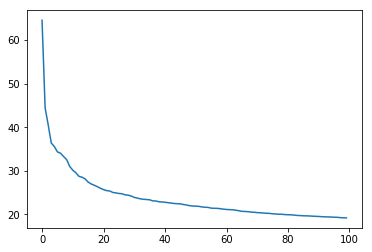

In [4]:
ut100, s100, vt100 = svd(URM,100)
plt.plot(list(s100))
plt.show()

In [5]:
ut100.shape

(100, 45649)

In [6]:
vt100.shape

(100, 100000)

In [7]:
S=diags(s100)
S.shape

(100, 100)

In [8]:
U=lil_matrix(ut100).T
U=filterPLrow(U)
U

<10000x100 sparse matrix of type '<class 'numpy.float64'>'
	with 1000000 stored elements in LInked List format>

In [9]:
VT=lil_matrix(vt100)
VT=filterTcol(VT)
VT

<100x32195 sparse matrix of type '<class 'numpy.float64'>'
	with 3219400 stored elements in LInked List format>

In [10]:
A=U*S.power(1/2)
A

<10000x100 sparse matrix of type '<class 'numpy.float64'>'
	with 1000000 stored elements in Compressed Sparse Row format>

In [11]:
B=S.power(1/2)*VT
B

<100x32195 sparse matrix of type '<class 'numpy.float64'>'
	with 3219400 stored elements in Compressed Sparse Row format>

In [12]:
RR=A*B
RR

<10000x32195 sparse matrix of type '<class 'numpy.float64'>'
	with 321940000 stored elements in Compressed Sparse Row format>

In [13]:
URM_target=filterTarget(URM)
URM_target

<10000x32195 sparse matrix of type '<class 'numpy.int32'>'
	with 198708 stored elements in Compressed Sparse Column format>

In [14]:
RR=RR-URM_target

In [36]:
%time compute("prova2.csv", RR)

Wall time: 1min 1s===========================================] 100.0% ...done


In [18]:
RR

<10000x32195 sparse matrix of type '<class 'numpy.float64'>'
	with 321940000 stored elements in Compressed Sparse Row format>

In [24]:
ravel(RR.getrow(0).todense()) is RR.getrow(0).data

False